In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2_contingency
from sklearn.metrics import roc_curve, auc
from google.colab import files
from scipy import stats

In [ ]:
# Upload csv file to colab for using it
upload_file = files.upload()

Saving Dai_ninth_task.csv to Dai_ninth_task.csv


In [ ]:
# Use the uploaded file in colab
ruf9 = pd.read_csv("Dai_ninth_task.csv")
ruf9.head()

,Gap_index_RGU,Surgical_Steps
0,0.93,1
1,1.01,1
2,0.65,1
3,0.54,1
4,0.62,2


In [ ]:
# Check column names to ensure 'Surgical_Steps' is correctly referenced
print("Columns in DataFrame:", ruf9.columns)

# Strip any leading/trailing spaces from the column names to avoid referencing issues
ruf9.columns = ruf9.columns.str.strip()

Columns in DataFrame: Index(['Gap_index_RGU', 'Surgical_Steps'], dtype='object')


In [ ]:
# Separate the data based on the Surgical_Steps value
Surgical_Steps_1 = ruf9[ruf9['Surgical_Steps'] == 1]
Surgical_Steps_2 = ruf9[ruf9['Surgical_Steps'] == 2]


# Remove 'Surgical_Steps' column from calculation
Surgical_Steps_1 = Surgical_Steps_1.drop(columns='Surgical_Steps')
Surgical_Steps_2 = Surgical_Steps_2.drop(columns='Surgical_Steps')


# Use describe function to get statistical summary for both groups
describe_steps_1 = Surgical_Steps_1.describe()
describe_steps_2 = Surgical_Steps_2.describe()


# Display the results
print("Statistical Summary for Surgical Steps 1:")
print(describe_steps_1)

Statistical Summary for Surgical Steps 1:
       Gap_index_RGU
count      13.000000
mean        0.833077
std         0.195123
min         0.500000
25%         0.740000
50%         0.850000
75%         0.950000
max         1.200000


In [ ]:
# Display the results
print("Statistical Summary for Surgical Steps 2:")
print(describe_steps_2)

Statistical Summary for Surgical Steps 2:
       Gap_index_RGU
count       7.000000
mean        0.582857
std         0.192416
min         0.400000
25%         0.410000
50%         0.570000
75%         0.725000
max         0.840000


In [ ]:
# Extract only count and mean for each Surgical Steps
count_mean_steps_1 = describe_steps_1.loc[['count', 'mean']]
count_mean_steps_2 = describe_steps_2.loc[['count', 'mean']]

# Display the results
print("Count and Mean for Surgical Steps 1:")
print(count_mean_steps_1)

print("\nCount and Mean for Surgical Steps 2:")
print(count_mean_steps_2)

Count and Mean for Surgical Steps 1:
       Gap_index_RGU
count      13.000000
mean        0.833077

Count and Mean for Surgical Steps 2:
       Gap_index_RGU
count       7.000000
mean        0.582857


In [ ]:
# Calculate mean values for each Surgical Steps
mean_steps_1 = count_mean_steps_1.loc['mean'].values[0]
mean_steps_2 = count_mean_steps_2.loc['mean'].values[0]

# Count the number of values less than and greater than the mean for each Surgical Steps
less_than_mean_steps_1 = (Surgical_Steps_1['Gap_index_RGU'] < mean_steps_1).sum()
greater_than_mean_steps_1 = (Surgical_Steps_1['Gap_index_RGU'] > mean_steps_1).sum()

less_than_mean_steps_2 = (Surgical_Steps_2['Gap_index_RGU'] < mean_steps_2).sum()
greater_than_mean_steps_2 = (Surgical_Steps_2['Gap_index_RGU'] > mean_steps_2).sum()

# Display the results
print(f"\nSurgical Steps = 1")
print(f"Number of values less than mean value(FN): {less_than_mean_steps_1}")
print(f"Number of values greater than mean value(TN): {greater_than_mean_steps_1}")

print(f"\nSurgical Steps = 2")
print(f"Number of values less than mean value(TP): {less_than_mean_steps_2}")
print(f"Number of values greater than mean value(FP): {greater_than_mean_steps_2}")


Surgical Steps = 1
Number of values less than mean value(FN): 6
Number of values greater than mean value(TN): 7

Surgical Steps = 2
Number of values less than mean value(TP): 4
Number of values greater than mean value(FP): 3


In [ ]:
# Calculate the fixed threshold value
threshold_value = 0.708

# Count the number of values less than and greater than the fixed threshold for each Surgical Steps
less_than_threshold_steps_1 = (Surgical_Steps_1['Gap_index_RGU'] < threshold_value).sum()
greater_than_threshold_steps_1 = (Surgical_Steps_1['Gap_index_RGU'] > threshold_value).sum()

less_than_threshold_steps_2 = (Surgical_Steps_2['Gap_index_RGU'] < threshold_value).sum()
greater_than_threshold_steps_2 = (Surgical_Steps_2['Gap_index_RGU'] > threshold_value).sum()

# Display the results
print(f"\nSurgical Steps = 1")
print(f"Number of values less than threshold value (FN): {less_than_threshold_steps_1}")
print(f"Number of values greater than threshold value (TN): {greater_than_threshold_steps_1}")

print(f"\nSurgical Steps = 2")
print(f"Number of values less than threshold value (TP): {less_than_threshold_steps_2}")
print(f"Number of values greater than threshold value (FP): {greater_than_threshold_steps_2}")


Surgical Steps = 1
Number of values less than threshold value (FN): 3
Number of values greater than threshold value (TN): 10

Surgical Steps = 2
Number of values less than threshold value (TP): 5
Number of values greater than threshold value (FP): 2


In [ ]:
# For mean value
# Surgical Steps = 1
# Number of values less than mean value(FN): 6
# Number of values greater than mean value(TN): 7

# Surgical Steps = 2
# Number of values less than mean value(TP): 4
# Number of values greater than mean value(FP): 3

# # Updated values
# TP = 3
# FN = 7
# TN = 6
# FP = 4

# for threshold_value from average of mean for both surgical value
# Surgical Steps = 1
# Number of values less than threshold value (FN): 3
# Number of values greater than threshold value (TN): 10

# Surgical Steps = 2
# Number of values less than threshold value (TP): 5
# Number of values greater than threshold value (FP): 2

# # Updated values
# TP = 2
# FN = 10
# TN = 3
# FP = 5

In [ ]:
# Calculate mean values for each Surgical Steps
mean_steps_1 = count_mean_steps_1.loc['mean'].values[0]
mean_steps_2 = count_mean_steps_2.loc['mean'].values[0]

# Count the number of values less than and greater than the mean for each Surgical Steps
less_than_mean_steps_1 = (Surgical_Steps_1['Gap_index_RGU'] < mean_steps_1).sum()
greater_than_mean_steps_1 = (Surgical_Steps_1['Gap_index_RGU'] > mean_steps_1).sum()

less_than_mean_steps_2 = (Surgical_Steps_2['Gap_index_RGU'] < mean_steps_2).sum()
greater_than_mean_steps_2 = (Surgical_Steps_2['Gap_index_RGU'] > mean_steps_2).sum()

# Display the results
print(f"\nSurgical Steps = 1")
print(f"Number of values less than mean value(FN): {less_than_mean_steps_1}")
print(f"Number of values greater than mean value(TN): {greater_than_mean_steps_1}")

print(f"\nSurgical Steps = 2")
print(f"Number of values less than mean value(TP): {less_than_mean_steps_2}")
print(f"Number of values greater than mean value(FP): {greater_than_mean_steps_2}")


Surgical Steps = 1
Number of values less than mean value(FN): 6
Number of values greater than mean value(TN): 7

Surgical Steps = 2
Number of values less than mean value(TP): 4
Number of values greater than mean value(FP): 3


In [ ]:
# Calculate mean values for each Surgical Steps
mean_steps_1 = count_mean_steps_1.loc['mean'].values[0]
mean_steps_2 = count_mean_steps_2.loc['mean'].values[0]

# Count the number of values less than and greater than the mean for each Surgical Steps
less_than_mean_steps_1 = (Surgical_Steps_1['Gap_index_RGU'] < mean_steps_1).sum()
greater_than_mean_steps_1 = (Surgical_Steps_1['Gap_index_RGU'] > mean_steps_1).sum()

less_than_mean_steps_2 = (Surgical_Steps_2['Gap_index_RGU'] < mean_steps_2).sum()
greater_than_mean_steps_2 = (Surgical_Steps_2['Gap_index_RGU'] > mean_steps_2).sum()

# Display the results
print(f"\nSurgical Steps = 1")
print(f"Number of values less than mean value(FN): {less_than_mean_steps_1}")
print(f"Number of values greater than mean value(TN): {greater_than_mean_steps_1}")

print(f"\nSurgical Steps = 2")
print(f"Number of values less than mean value(TP): {less_than_mean_steps_2}")
print(f"Number of values greater than mean value(FP): {greater_than_mean_steps_2}")


Surgical Steps = 1
Number of values less than mean value(FN): 6
Number of values greater than mean value(TN): 7

Surgical Steps = 2
Number of values less than mean value(TP): 4
Number of values greater than mean value(FP): 3


In [ ]:
from scipy import stats
# Perform Mann-Whitney U test comparing the two groups
from scipy.stats import mannwhitneyu
u_statistic, p_value = stats.mannwhitneyu(
    Surgical_Steps_1['Gap_index_RGU'],
    Surgical_Steps_2['Gap_index_RGU']
)

# Display the results
print("Mann-Whitney Result for Comparison of Surgical Steps 1 and 2:")
print("Gap_index_RGU vs Surgical Steps 1 vs Surgical Steps 2")
print("U Statistic:", u_statistic)
print("p-Value:", p_value)

Mann-Whitney Result for Comparison of Surgical Steps 1 and 2:
Gap_index_RGU vs Surgical Steps 1 vs Surgical Steps 2
U Statistic: 75.0
p-Value: 0.02141199707739096


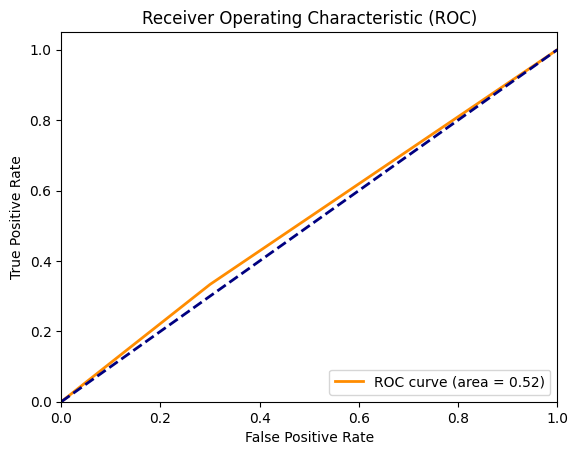

Sensitivity: 0.333
AUC: 0.517


In [ ]:
#when the average is taken for both Surgical Steps value for mean TN, FN , TP , FP.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Updated values
# TP = 3
# FN = 7
# TN = 6
# FP = 4

TP = 3
FN = 6
TN = 7
FP = 3


# Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Plotting the ROC curve
# For simplicity, let's use these values as the ROC points
fpr = [0, 1 - specificity, 1]  # False Positive Rate
tpr = [0, sensitivity, 1]      # True Positive Rate

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Print Sensitivity and AUC
print(f"Sensitivity: {sensitivity:.3f}")
print(f"AUC: {roc_auc:.3f}")

<ipython-input-21-2d304084731a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ruf9[col], fit=norm, kde=False)


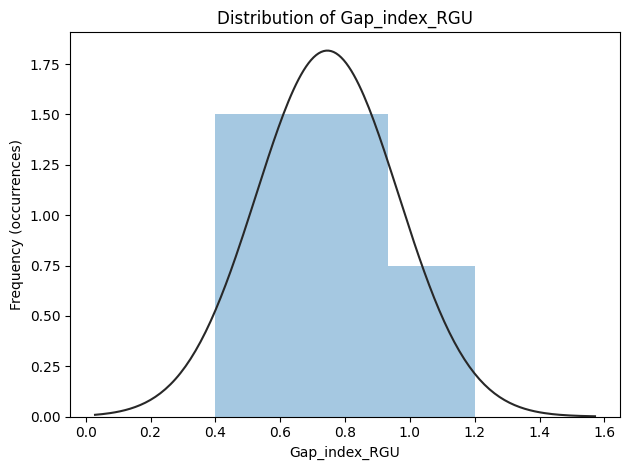

In [ ]:
# Plot distribution plots with normal distribution curve
columns_to_plot = ruf9.columns[:-1]  # Exclude 'Surgical_Steps'

# plt.figure(figsize=(10, 20))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)  # Create a vertical layout
    sns.distplot(ruf9[col], fit=norm, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency (occurrences)')

plt.tight_layout()
plt.show()